# Task 4 - Proxy Target Variable Engineering 

In [2]:
import numpy as np
from datasets import Dataset, ClassLabel, Sequence
import pandas as pd
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForTokenClassification
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../src"))
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("..")
print(os.getcwd()) 

d:\KAIM 5,6,7\Week-5\Credit-Risk-Probability-Model


In [4]:
from proxy_target_variable import *

### Load the cleaned dataset

In [5]:
df = load_data('Data/raw/data.csv')
df

Data loaded successfully with 95662 rows and 16 columns.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [6]:
rfm = create_rfm_features(df)
rfm

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,84,1,10000
1,CustomerId_10,84,1,10000
2,CustomerId_1001,90,5,30400
3,CustomerId_1002,26,11,4775
4,CustomerId_1003,12,6,32000
...,...,...,...,...
3737,CustomerId_992,5,6,32000
3738,CustomerId_993,26,5,32000
3739,CustomerId_994,1,101,614077
3740,CustomerId_996,68,17,151000


In [7]:
rfm_scaled = scale_rfm_features(rfm)
rfm_scaled

array([[ 1.93760472, -0.25345907, -0.08952358],
       [ 1.93760472, -0.25345907, -0.08952358],
       [ 2.15888193, -0.21218649, -0.08201119],
       ...,
       [-1.1233968 ,  0.77835538,  0.13293045],
       [ 1.34753213, -0.08836876, -0.03759971],
       [-1.1233968 , -0.03677804, -0.03318065]], shape=(3742, 3))

In [8]:
rfmc = cluster_customers(rfm_scaled, rfm)
rfmc

,CustomerId,Recency,Frequency,Monetary,Cluster
0,CustomerId_1,84,1,10000,0
1,CustomerId_10,84,1,10000,0
2,CustomerId_1001,90,5,30400,0
3,CustomerId_1002,26,11,4775,2
4,CustomerId_1003,12,6,32000,2
...,...,...,...,...,...
3737,CustomerId_992,5,6,32000,2
3738,CustomerId_993,26,5,32000,2
3739,CustomerId_994,1,101,614077,2
3740,CustomerId_996,68,17,151000,0


In [9]:
high_risk_cluster = identify_high_risk_cluster(rfmc)
high_risk_cluster

np.int32(0)

In [10]:
rfm_labels = assign_high_risk_label(rfm, high_risk_cluster)
rfm_labels

,CustomerId,is_high_risk
0,CustomerId_1,1
1,CustomerId_10,1
2,CustomerId_1001,1
3,CustomerId_1002,0
4,CustomerId_1003,0
...,...,...
3737,CustomerId_992,0
3738,CustomerId_993,0
3739,CustomerId_994,0
3740,CustomerId_996,1


In [11]:
df_final = merge_with_main_data(df, rfm_labels)
df_final

Data merged with high-risk labels successfully.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,is_high_risk
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,0


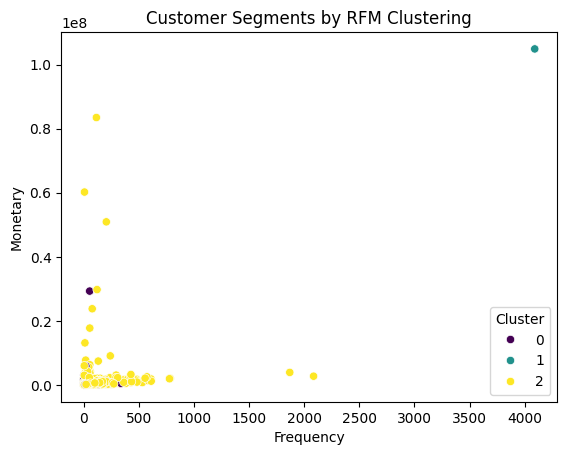

In [12]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title("Customer Segments by RFM Clustering")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

In [17]:
df_final.to_csv("Data/processed/target_data.csv", index=False)
print("✅ Proxy target variable `is_high_risk` created and saved as 'processed_with_target.csv'.")

✅ Proxy target variable `is_high_risk` created and saved as 'processed_with_target.csv'.


In [ ]:
df_target = pd.read_csv('Data/processed/target_data.csv')
df_target